# Part II - Exploring Bike-Sharing Patterns in San Francisco

## by Bashir Ibraheem Olamide

## Investigation Overview


> In this investigation, I delved into the Ford GoBike System dataset, focusing on how trip durations vary concerning date and time factors, specifically hours of the day, days of the week, and customer types. My presentation aims to convey key insights derived from this exploratory data analysis (EDA). These insights include the influence of user types, where subscribers tend to opt for shorter rides while customers exhibit more diverse ride durations. Additionally, we explore the limited impact of gender on ride duration and the significance of bike-sharing behavior, highlighting its role in determining ride durations. Age is also considered, revealing a cluster of shorter rides among younger users. Through visualizations and insights, my presentation provides a comprehensive understanding of bike-sharing patterns and user behaviors in San Francisco.


## Dataset Overview and Executive Summary

> • The dataset consists of approximately 183,000 bike-sharing rides in the greater San Francisco Bay area during February and March 2019.  
• Features include ride duration (in seconds), user type, gender, user age, bike sharing status, and timestamp data.  
• About 8,000 data points were removed due to inconsistencies or missing information.

>The exploration of bike-sharing patterns in San Francisco has uncovered several significant insights. User type has a substantial influence on ride behavior, with subscribers favoring shorter, concentrated rides, likely for daily commuting, while customers exhibit more varied ride durations, reflecting diverse usage patterns. Gender, however, has limited impact on ride duration, as most data points indicate shorter rides regardless of gender, although some longer rides are prevalent among males. Bike sharing status plays a pivotal role, with non-bike-sharing users taking longer rides on average. Although age doesn't show a strong linear correlation with ride duration, younger users tend to opt for shorter rides.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the cleaned dataset into a pandas dataframe

dataset =pd.read_csv('201902-fordgobike-tripdata-cleaned.csv')

## Frequency of Rides by Days

Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest trip records. This distribution of trip records underscores a clear preference for weekday travel compared to weekends.

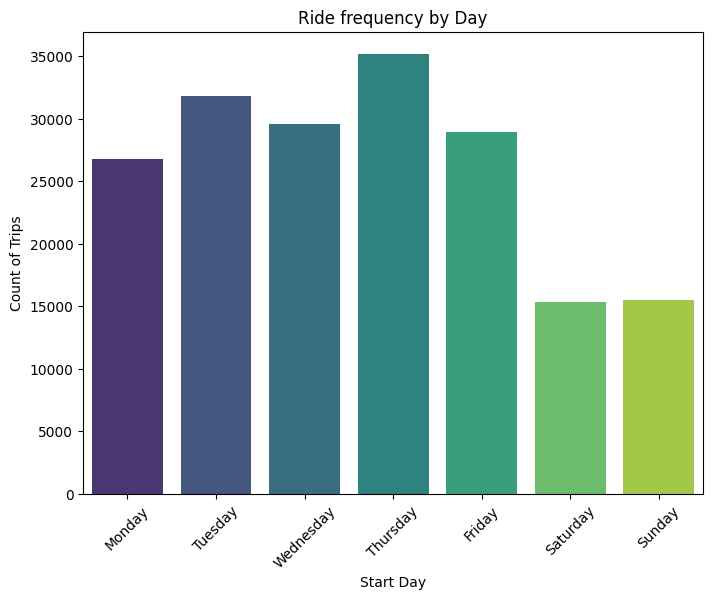

In [22]:
# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create two count plots to visualize the number of trips for 'start_day' and 'end_day'
plt.figure(figsize=(8, 6))

# Count plot for 'start_day'
sns.countplot(data=dataset, x='start_day', palette='viridis', order=day_order)
plt.title('Ride frequency by Day')
plt.xlabel('Start Day')
plt.ylabel('Count of Trips')
plt.xticks(rotation=45)
plt.show()

## Frequency of Rides by Hours

The frequency of rides by hours also shows a bimodal distribution, with peaks in the morning (8th and 9th hours) and evening (17th and 18th hours), indicating bike rides are popular for daily work commutes. 

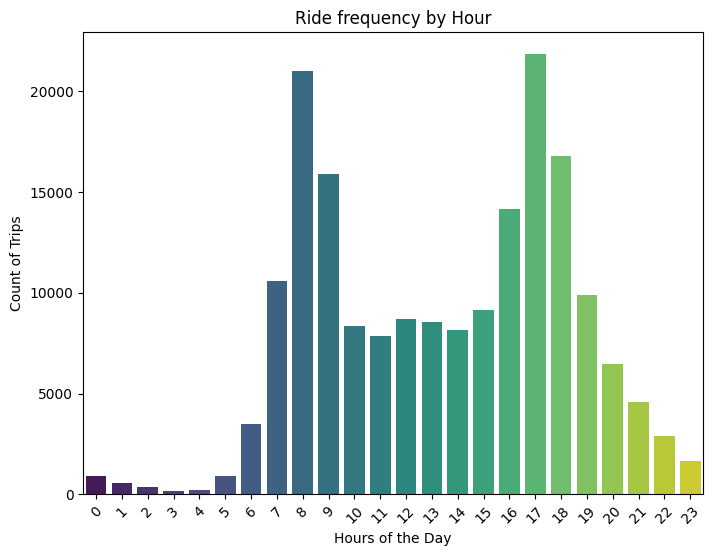

In [23]:
# Create count plots for ride frequency per hour
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='start_hour', palette='viridis')
plt.title('Ride frequency by Hour')
plt.xlabel('Hours of the Day')
plt.ylabel('Count of Trips')
plt.xticks(rotation=45)
plt.show()

## Frequency of Rides by User Age

The frequency of rides by user age shows a right-skewed distribution, with a peak at 30-35 years. This distribution indicates that most users are in their 30s, with a gradual decline in the number of users as age increases.

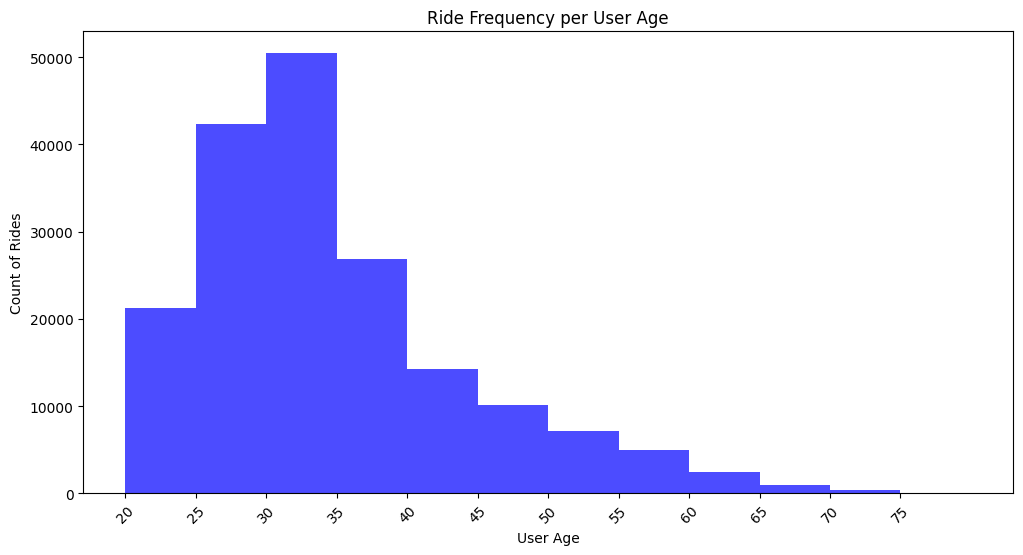

In [33]:
# Calculate user age based on birth year
year_of_data = 2019
dataset['user_age'] = year_of_data - dataset['member_birth_year']

bins = np.arange(20, 81, 5)

# Create histogram to visualize ride frequency per user age
plt.figure(figsize=(12, 6))
plt.hist(data=dataset, x='user_age', color='blue', bins=bins, alpha=0.7)
plt.title('Ride Frequency per User Age')
plt.xlabel('User Age')
plt.ylabel('Count of Rides')
plt.xticks(np.arange(20,80,5), rotation=45)
plt.show()

## Frequency of Rides by User Type

The frequency of rides by user type shows that subscribers account for the majority of rides (over 89%), with customers accounting for a much smaller proportion.

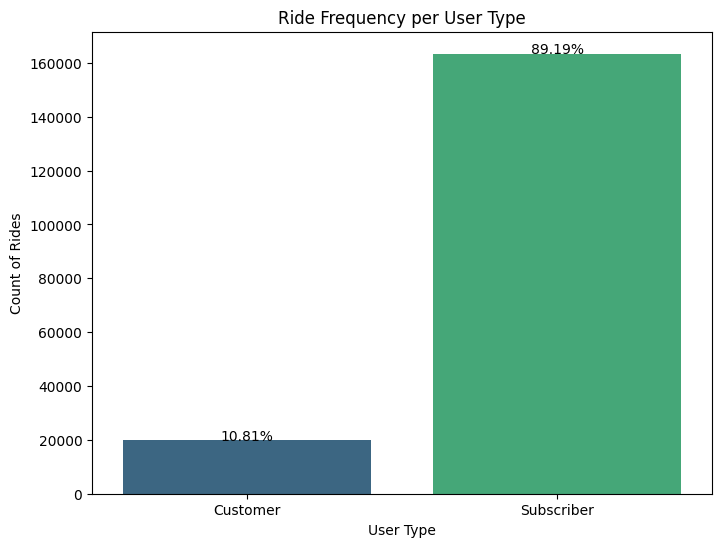

In [24]:
# Create a count plot to visualize ride frequency per user type
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=dataset, x='user_type', palette='viridis')
plt.title('Ride Frequency per User Type')
plt.xlabel('User Type')
plt.ylabel('Count of Rides')

total = len(dataset)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 50
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

## Trip Duration across Gender, User Type and User Age

There is a wide range of ride durations for users of different ages, genders, and types. Most prominently, subscribers, regardless of their age or gender, tend to have shorter ride durations, while customers show more variability, with some taking significantly longer rides. Additionally, there are more male subscribers among younger users taking shorter rides compared to female subscribers.

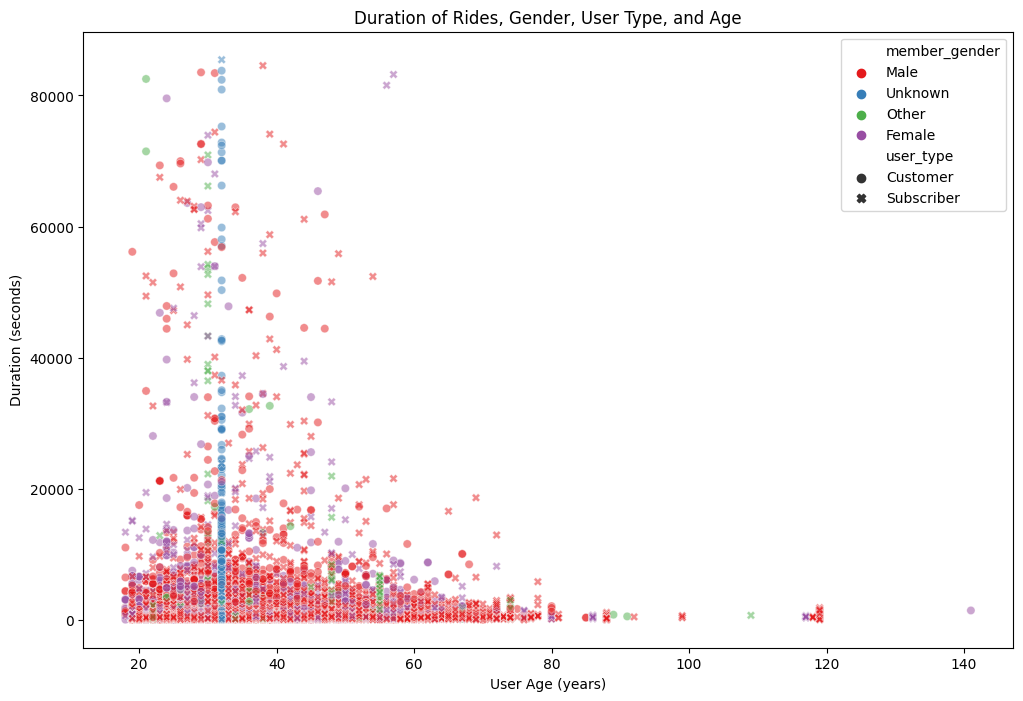

In [39]:
# Create scatterplot of duration vs. age with additional encodings for gender and user type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dataset, x='user_age', y='duration_sec', hue='member_gender', palette='Set1', alpha=0.5, style='user_type')
plt.title('Duration of Rides, Gender, User Type, and Age')
plt.xlabel('User Age (years)')
plt.ylabel('Duration (seconds)')
plt.legend()
plt.show()

## Trip Duration across Gender, User Age and Bike Sharing Status

Longer-duration rides are more frequently associated with male users. Bike sharing status, whether for all trips or not, does not appear to exert a substantial influence on ride duration. This underscores the significance of user age and gender in shaping ride duration patterns, also highlights the relative insignificance of bike sharing status in this context.

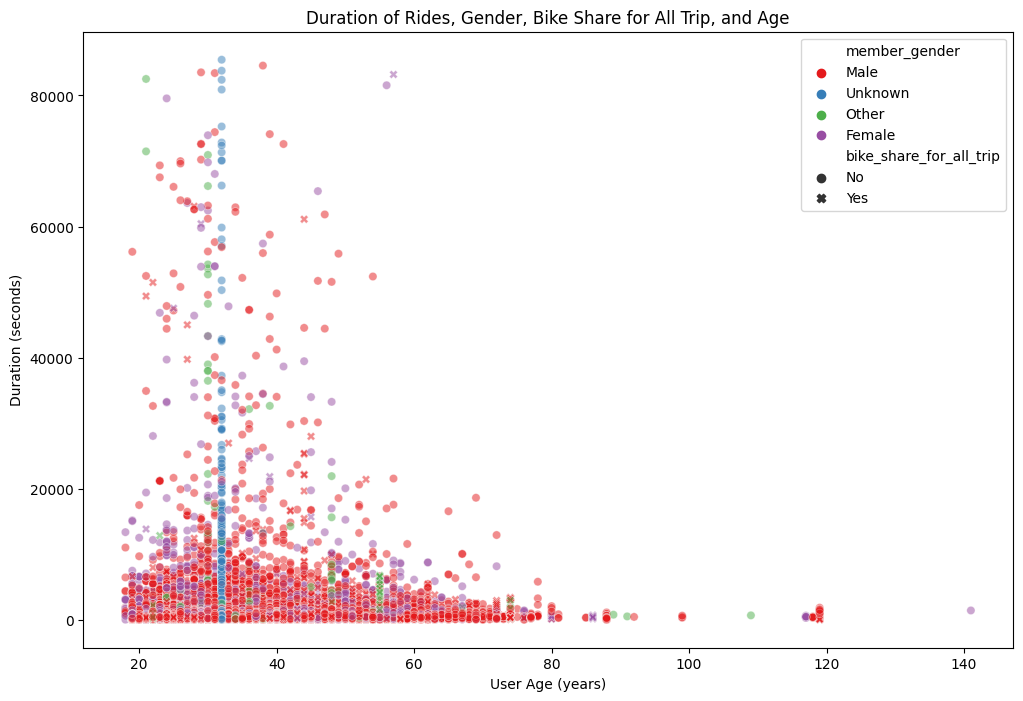

In [40]:
# Create scatterplot of duration and age with additional encodings for gender and bike sharing
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dataset, x='user_age', y='duration_sec', hue='member_gender', palette='Set1', alpha=0.5, style='bike_share_for_all_trip')
plt.title('Duration of Rides, Gender, Bike Share for All Trip, and Age')
plt.xlabel('User Age (years)')
plt.ylabel('Duration (seconds)')
plt.legend()
plt.show()